<a href="https://colab.research.google.com/github/GitBerg/Machine_Learning_Study/blob/master/03-Aprendizagem%20por%20%C3%A1rvore%20de%20decis%C3%A3o/Machine_Learning_%C3%81rvores_De_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly --upgrade

     |████████████████████████████████| 13.2MB 310kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#**Árvores De Decisão**

In [3]:
from sklearn.tree import DecisionTreeClassifier

#**Base Risco de Crédito**

In [4]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risc_credit, y_risc_credit = pickle.load(f)

In [5]:
X_risc_credit

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [6]:
y_risc_credit

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [7]:
arvore_risc_credit = DecisionTreeClassifier(criterion="entropy")
arvore_risc_credit.fit(X_risc_credit, y_risc_credit)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
arvore_risc_credit.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

In [15]:
arvore_risc_credit.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

[Text(310.0, 498.3, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(186.0, 407.70000000000005, 'história <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(124.0, 317.1, 'renda <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(62.0, 226.5, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(186.0, 226.5, 'história <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]\nclass = moderado'),
 Text(124.0, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(248.0, 135.89999999999998, 'dívida <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = alto'),
 Text(186.0, 45.299999999999955, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(310.0, 45.299999999999955, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(248.0, 317.1, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),


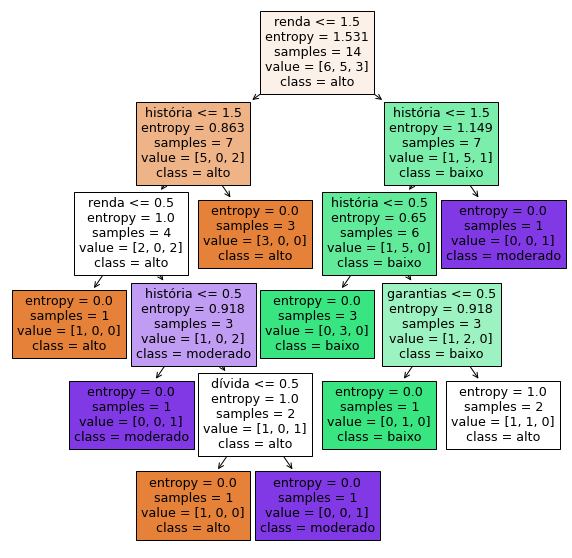

In [19]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risc_credit, feature_names = previsores, class_names= arvore_risc_credit.classes_, filled=True)

In [21]:
previsoes = arvore_risc_credit.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)